In [2]:
data=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

<IPython.core.display.Javascript object>

In [10]:
data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [50]:
import pyforest
import numpy as np
import pandas as pd

In [22]:
data.shape

(506, 14)

In [23]:
data.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [24]:
data['MEDV'].sum()

11401.600000000002

<IPython.core.display.Javascript object>

<Axes: xlabel='MEDV'>

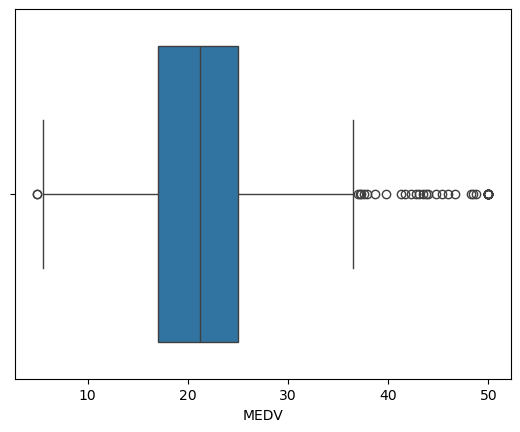

In [25]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(data=data,x='MEDV')

In [32]:
import matplotlib.pyplot as plt

In [33]:
new= data.CHAS.value_counts()

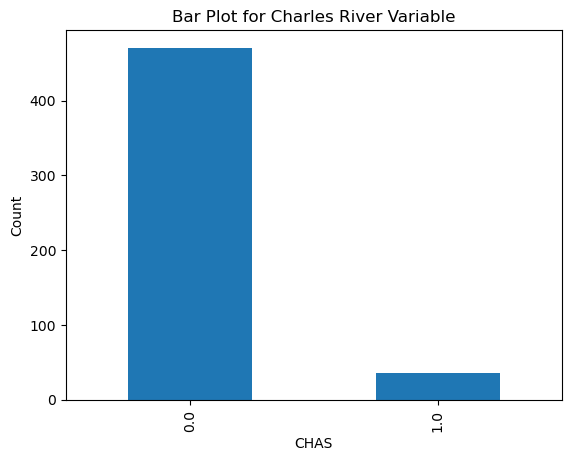

In [44]:
## Provide a  bar plot for the Charles river variable

data['CHAS'].value_counts().plot(kind='bar')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.title('Bar Plot for Charles River Variable')
plt.show()

In [45]:
## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Discretize the AGE variable into three groups
data['AGE_Group'] = pd.cut(data['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

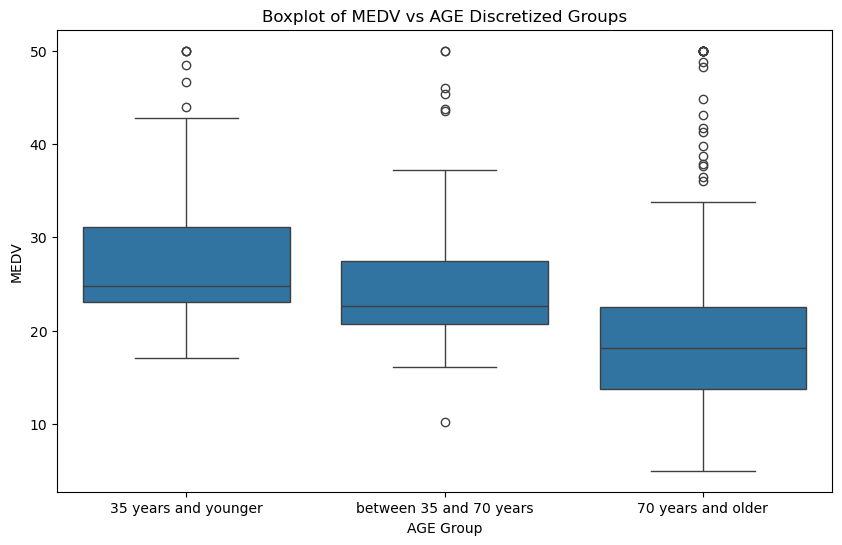

In [37]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=data)
plt.title('Boxplot of MEDV vs AGE Discretized Groups')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

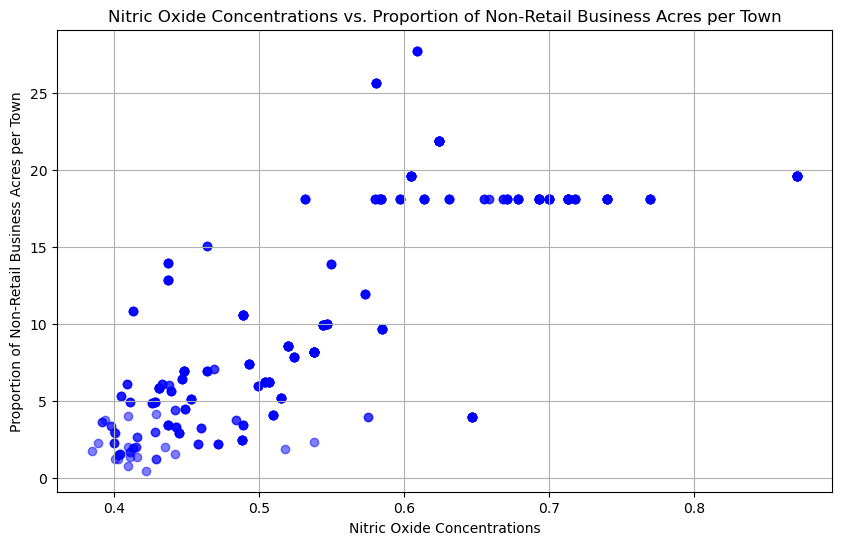

In [39]:
## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['NOX'], data['INDUS'], color='b', alpha=0.5)
plt.title('Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres per Town')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.grid(True)
plt.show()

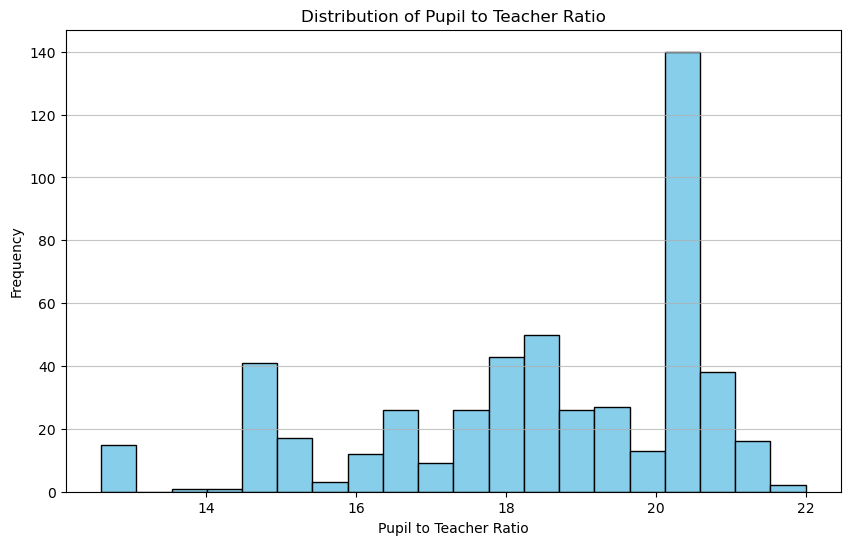

In [47]:
## Create a histogram for the pupil to teacher ratio variable
# Create a histogram for the 'PTRATIO' (Pupil to Teacher Ratio) variable
plt.figure(figsize=(10, 6))
plt.hist(data['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Pupil to Teacher Ratio')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [49]:
from scipy import stats
## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Filter data for houses bounded by the Charles river
charles_river = data[data['CHAS'] == 1]['MEDV']

# Filter data for houses not bounded by the Charles river
no_charles_river = data[data['CHAS'] == 0]['MEDV']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(charles_river, no_charles_river)

# Output the results
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [52]:
## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Perform ANOVA
model = ols('MEDV ~ C(AGE)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df         F   PR(>F)
C(AGE)    29884.038419  355.0  0.984009  0.55397
Residual  12832.256996  150.0       NaN      NaN


In [53]:
## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


# Calculate Pearson correlation
pearson_correlation = data['NOX'].corr(data['INDUS'])

print("Pearson Correlation between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town:", pearson_correlation)


Pearson Correlation between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town: 0.763651446920914


In [54]:
## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

from sklearn.linear_model import LinearRegression

# Prepare the data
X = data[['DIS']]  # Weighted distance to employment centers
y = data['MEDV']   # Median value of owner-occupied homes

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Get the coefficient for the weighted distance
impact_coefficient = model.coef_[0]
print(f"Impact of an additional weighted distance to employment centers on median home value: {impact_coefficient}")

Impact of an additional weighted distance to employment centers on median home value: 1.0916130158411093
